# DS 3000 - Assignment 8

**Student Name**: [Julia Ouritskaya]

**Date**: [10/27/2023]


### Submission Instructions
Submit this `ipynb` file to canvas.

The `ipynb` format stores outputs from the last time you ran the notebook.  (When you open a notebook it has the figures and outputs of the last time you ran it too).  To ensure that your submitted `ipynb` file represents your latest code, make sure to give a fresh run `Kernel > Restart & Run All` just before uploading the `ipynb` file to Canvas.

### Academic Integrity

**Writing your homework is an individual effort.**  You may discuss general python problems with other students but under no circumstances should you observe another student's code which was written for this assignment, from this year or past years.  Pop into office hours or DM us in MS Teams if you have a specific question about your work or if you would like another pair of eyes or talk through your code.

Don't forget to cite websites which helped you solve a problem in a unique way.  You can do this in markdown near the code or with a simple one-line comment. You do not need to cite the official python documentation.

**Documentation / style counts for credit**  Please refer to the Pep-8 style, to improve the readability and consistency of your Python code. For more information, read the following article [How to Write Beautiful Python Code With PEP 8](https://realpython.com/python-pep8/) or ask your TA's for tips.

**NOTE:<span style='color:red'> Write python expressions to answer ALL questions below and ensure that you use the `print()` function to display the output.</span>** Each question should be answered in a new code cell. For example, your solution for question 1.1 should be in a different code cell from your solution for question 1.2.

## Question 1 (0 pts)

The Organization for Economic Co-operation and Development (OECD) publishes data on the annual meat consumption for several countries. The data contains indicators for: beef and veal, pig, poultry, and sheep; and their consumption is measured in thousand tonnes of carcass weight and kilograms of retail weight per capita.

Write python code to answer the questions below and ensure that you round all numeric calculations to 2 decimal places. 

Load the data directly from the URL. Ensure that you inspect the data, so that you know how to identify the necessary columns.
Note: this is an alternate link that can be used to load the data: https://drive.google.com/uc?id=1mEewmIvXA57H3upxkqx9vkZfKch9oDsL

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

# Load the data 
meat_consumption_df = pd.read_csv('meat_consumption.csv')

# Round all numeric columns to 2 decimal places
meat_consumption_df = meat_consumption_df.round(2)

# Inspect the data
meat_consumption_df.head()

,LOCATION,INDICATOR,SUBJECT,MEASURE,FREQUENCY,TIME,Value,Flag Codes
0,AUS,MEATCONSUMP,BEEF,KG_CAP,A,1990,0.00,NaN
1,AUS,MEATCONSUMP,BEEF,KG_CAP,A,1991,27.94,NaN
2,AUS,MEATCONSUMP,BEEF,KG_CAP,A,1992,26.40,NaN
3,AUS,MEATCONSUMP,BEEF,KG_CAP,A,1993,26.37,NaN
4,AUS,MEATCONSUMP,BEEF,KG_CAP,A,1994,25.66,NaN


## Question 2 (10 pts)

Extract the meat consumption data for any two countries of your choice and evaluate the patterns and trends in their meat consumption. You can explore any (2) types of meat (from the chosen countries), and you only need to select one unit of measurement**. Ensure that you visualize the data and explain your findings.

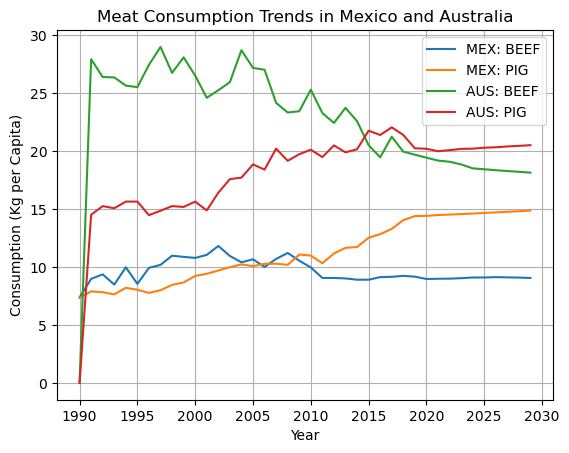

In [2]:
# Extract meat consumption data for Mexico and Australia, and for Beef and Pig meat
selected_countries = ['MEX', 'AUS']
selected_meats = ['BEEF', 'PIG']

# Measured in kilograms per capita
meat_consumption_mex_aus_beef_pig = meat_consumption_df[
    (meat_consumption_df['LOCATION'].isin(selected_countries)) & 
    (meat_consumption_df['SUBJECT'].isin(selected_meats)) &
    (meat_consumption_df['MEASURE'] == "KG_CAP")
]

# Plot the data
for country in selected_countries:
    for meat in selected_meats:
        sns.lineplot(data=meat_consumption_mex_aus_beef_pig[(meat_consumption_mex_aus_beef_pig.LOCATION == country) & (meat_consumption_mex_aus_beef_pig.SUBJECT == meat)],
                     x="TIME", y="Value", label=f"{country}: {meat}")

plt.title("Meat Consumption Trends in Mexico and Australia")
plt.ylabel("Consumption (Kg per Capita)")
plt.xlabel("Year")
plt.legend()
plt.grid(True)
plt.show()

Between 1990 and 2030, Austalia's beef consumption initially saw a sharp spike and then remained relatively high, with minor fluctuations. Over time, however it has decreased. Australia's pig consumption also saw a shark spike initially, and has steadily increased since, nearly doubling over the 40-year period. In contrast, Mexico's beef consumption started lower but generally increased until around the mid-2000s, when its pig consumption ended up surpassing it and steadily increasing. Overall, Australians had a stronger preference for beef up until 2015 when pig became more prevalent. Similarly, Mexicans initially had a stronger preference for beef, but have increased their pig intake overtime. 


## Question 3 (5 pts) 

Extract the poultry consumption data, from 1994 to 2014 (inclusive), for South Africa, that is measured in thousand tonnes of carcass weight**. Note: the filtered dataframe should only contain the time and the values.

In [3]:
# Extract the poultry consumption data, from 1994 to 2014 (inclusive), for South Africa, that is measured in thousand tonnes of carcass weight
poutry_consumption_sa = meat_consumption_df[
    (meat_consumption_df['LOCATION'] == "ZAF") & 
    (meat_consumption_df['SUBJECT'] == "POULTRY") & 
    (meat_consumption_df['TIME'] >= 1994) & 
    (meat_consumption_df['TIME'] <= 2014) & 
    (meat_consumption_df['MEASURE'] == "THND_TONNE")
]

# Display the filtered dataframe
poutry_consumption_sa[['TIME', 'Value']]

,TIME,Value
6444,1994,628.90
6445,1995,709.42
6446,1996,710.26
6447,1997,780.82
6448,1998,725.00
6449,1999,800.04
6450,2000,894.46
6451,2001,953.23
6452,2002,1003.44
6453,2003,1046.54


From 1994 to 2014, South Africa experienced a significant increase in poultry consumption, measured in thousand tonnes of carcass weight. It started at 628.90 thousand tonnes in 1914 and increased to 2133.79 thousand tonnes by 2014. This demonstrates a growing preference for poultry in South Africa.

## Question 4 (5 pts)

Summarize the extracted data using descriptive statistics. Explain the summary.

In [4]:
poutry_consumption_sa['Value'].describe().round(2)

count      21.00
mean     1224.01
std       466.22
min       628.90
25%       800.04
50%      1084.41
75%      1598.91
max      2113.79
Name: Value, dtype: float64

This summary demonstrates the descriptive statistics for poultry consumption in South Africa from the years 1994 to 2014.
- count: There are 21 data entries for the years between 1994 to 2014.
- mean: Between 1994 and 2014, South Africa consumed around 1,224.01 thousand tonnes of poultry annually on average.
- std: The annual consumption values typically deviate from the mean by about 466.22 thousand tonnes.
- min: The minimum poultry consumption during this period was 628.90 thousand tonnes.
- 25% (First Quartile): 25% of the years had poultry consumption values below 800.04 thousand tonnes and 75% above it.
- 50% (Median): 50% of the years had poultry consumption values below 1084.41 and 50% above it.
- 75% (Third Quartile): 75% of the years had poultry consumption values below 1,598.91 thousand tonnes and 25% above it.
- max: The maximum poultry consumption during this period was 2,113.79 thousand tonnes. 

## Question 5 (10 pts)

Visualize the extracted data, using a line chart, and comment on the trend.

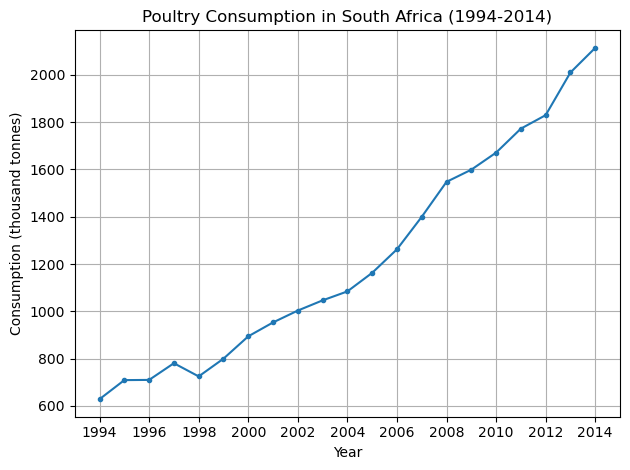

In [5]:
# Visualize the extracted data using a line chart
plt.plot(poutry_consumption_sa['TIME'], poutry_consumption_sa['Value'], marker='.', linestyle='-')
plt.title('Poultry Consumption in South Africa (1994-2014)')
plt.xlabel('Year')
plt.ylabel('Consumption (thousand tonnes)')
plt.xticks(np.arange(1994, 2015, 2)) 
plt.grid(True)
plt.tight_layout()
plt.show()

This line chart demonstrates the trends in poultry consumption in South Africa between 1994 and 2014, measured in thousand tonnes of carcass weight. Overall, there's a clear upward trend in poultry consumption. There are two minor declines around 1995 and 1997, but consumption generally icreases steadily throughout the period.

## Question 6 (15 pts)

Predict the poultry consumption for 2015 and 2016, using simple linear regression. Ensure that you visualize the original data and also include the predictions from the model.

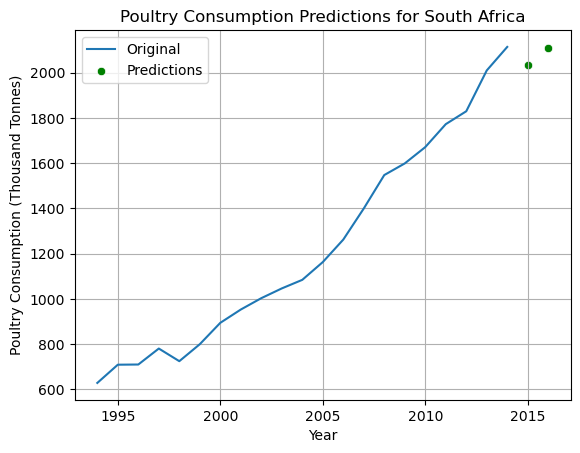

Predicted poultry consumption values are 2034.06 thousand tonnes for 2015 and 2107.70 thousand tonnes for 2016.


In [6]:
# Preparing the data
X = poutry_consumption_sa['TIME'].values.reshape(-1, 1)
y = poutry_consumption_sa['Value'].values.reshape(-1, 1)

# Building the model
lr_model = LinearRegression()
lr_model.fit(X, y)

# Predicting for 2015 and 2016
years_to_predict = np.array([2015, 2016]).reshape(-1, 1)
predictions = lr_model.predict(years_to_predict)

# Plotting the original data and predictions
sns.lineplot(data=poutry_consumption_sa, x='TIME', y='Value', label='Original')
sns.scatterplot(x=years_to_predict[:, 0], y=predictions[:, 0], color='green', label='Predictions')
plt.title('Poultry Consumption Predictions for South Africa')
plt.xlabel('Year')
plt.ylabel('Poultry Consumption (Thousand Tonnes)')
plt.grid(True)
plt.legend()
plt.show()

print(f"Predicted poultry consumption values are {predictions[0, 0]:.2f} thousand tonnes for 2015 and {predictions[1, 0]:.2f} thousand tonnes for 2016.")

## Question 7 (5 pts)

Calculate the R-squared and explain what this tells you about the model.

In [7]:
#get r-squared, i.e. the coefficient of determination
r_sqrd = lr_model.score(X, y)
r_sqrd = round(r_sqrd, 5)

print(f'r-squared value: {r_sqrd:.2f}')

r-squared value: 0.96


The r-squared value of 0.96 indicates that around 96% of the variance in the poultry consumption data can be explained by the linear regression model. Thus, the model fits the data very well, meaning that the year (independent variable) effectively predicts poultry consumption (dependent variable) for South Africa between 1994 and 2014. 

## Helpful resources 
Don't forget to cite websites which helped you solve a problem in a unique way.  You can do this in markdown near the code or with a simple one-line comment inside the code cell, or you can list them below. 

You do not need to cite the official python documentation.
